<a href="https://colab.research.google.com/github/sarthakbiswas97/ML-with-pyTorch-and-scikit-learn/blob/main/EDA_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy

**Create arrays and specify dtype**

In [88]:
import numpy as np

a = np.array([1, 2, 3])                 # from list[1]
b = np.zeros(3)                          # [0., 0., 0.][1]
c = np.ones((2, 2), dtype=np.int64)      # 2x2 ones, integer[1]
d = np.arange(2, 10, 2)                  # [2, 4, 6, 8][1]
e = np.linspace(0, 1, num=5)             # [0., 0.25, 0.5, 0.75, 1.][1]

**Indexing, slicing, and views**

In [89]:
x = np.arange(10)
print(x)
# print(x[0]) #first element
# print(x[-1]) # last element
print(x[:3]) # first three
print(x[3:]) # skips first three elements
print(x[3:7]) # index 3 to 7 (excluding 7th)
print(x[::3]) # prints at every interval of 3 starting from first index

[0 1 2 3 4 5 6 7 8 9]
[0 1 2]
[3 4 5 6 7 8 9]
[3 4 5 6]
[0 3 6 9]


**Vectorized math and broadcasting**

In [90]:
u = np.array([1,2,3])
v = np.array([10,20,30])
print(u+v)  #elemenwise addition
print(u*v)  #elementwise multiplication
print(u*10) #scalar boradcasting

[11 22 33]
[10 40 90]
[10 20 30]


**Aggregations and axes**

In [91]:
m = np.array([[1,1], [2,2]])
m.sum()
m.sum(axis=0) # columnwise (down the rows)
m.sum(axis=1) # rowwise (across columns)

array([2, 4])

**Reshaping**

In [92]:

y = np.arange(12).reshape(4,3)
y

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

# Pandas
Series, DataFrames, IO, Cleaning, EDA

**Creating data frame**

In [93]:
import pandas as pd

df = pd.DataFrame({
    "name": ["Ann", "Yi", "Nori"],
    "age": [24, 42, 18],
    "score": [79.0, 80.0, 84.0]
}, #index=["ex-1","ex-2","ex-3"]
)  # custom row labels

print(df)
# Dictionary keys become column labels
# we can give custom column labels as well just like rows=, columns=

df2 = pd.DataFrame(np.arange(6).reshape(3,2), columns=["a", "b"])
df2


   name  age  score
0   Ann   24   79.0
1    Yi   42   80.0
2  Nori   18   84.0


,a,b
0,0,1
1,2,3
2,4,5


**Inspecting data quickly**

In [94]:
df.head()
df.info()
df.describe()
df.shape
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    3 non-null      object 
 1   age     3 non-null      int64  
 2   score   3 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 204.0+ bytes


,0
name,object
age,int64
score,float64


**Selecting, filtering, assigning**

In [95]:

# Use loc for label-based and iloc for position-based selection
df["age"]
df[["name", "score"]]
df.loc[0]
df.loc[0:1, ["name","age"]] #row slice + columns
df.iloc[0:2, 1:3]

adults = df[df["age"] >= 30]
adults

df["passed"] = df["score"] >= 80
df["adults"] = df["age"] >= 30
# creates new column with the filtered data

df

,name,age,score,passed,adults
0,Ann,24,79.0,False,False
1,Yi,42,80.0,True,True
2,Nori,18,84.0,True,False


**Handling missing values**

In [96]:
# Returns the number of missing (NaN) values in each column.
df.isna().sum()

#  Replaces missing values in the "score"
# column with the median of that column.
df["score"] = df["score"].fillna(df["score"].median())
print(df)

# Removes any rows from the DataFrame
# where the "age" column has a missing value.
df.dropna(subset=["age"])
print(df)

   name  age  score  passed  adults
0   Ann   24   79.0   False   False
1    Yi   42   80.0    True    True
2  Nori   18   84.0    True   False
   name  age  score  passed  adults
0   Ann   24   79.0   False   False
1    Yi   42   80.0    True    True
2  Nori   18   84.0    True   False


**Groupby and aggregation**

In [97]:
df.groupby("passed")["age"].agg(["count", "mean", "min", "max"])
# “Group people by whether they passed or not,
# and for each group, show how many there are, their average age,
# youngest age, and oldest age.”

,count,mean,min,max
passed,,,,
False,1,24.0,24,24
True,2,30.0,18,42


**Sorting and value counts**

In [104]:
df.sort_values(by=["score"], ascending=False)

df["name"].value_counts()

,count
name,
Ann,1
Yi,1
Nori,1


**Merging and joining**

In [116]:
left = pd.DataFrame({"id":[1,2], "x":[10,20]})
right = pd.DataFrame({"id":[1,2], "y":["a","b"]})
merged = left.merge(right, on="id", how="inner")
print(left)
print("----")
print(right)
merged

   id   x
0   1  10
1   2  20
----
   id  y
0   1  a
1   2  b


,id,x,y
0,1,10,a
1,2,20,b


**Reading/writing files**

In [ ]:
df = pd.read_csv("data.csv")
df.to_csv("out.csv", index=False)

# Visualization for EDA with Matplotlib

**Basic line, labels, and show**

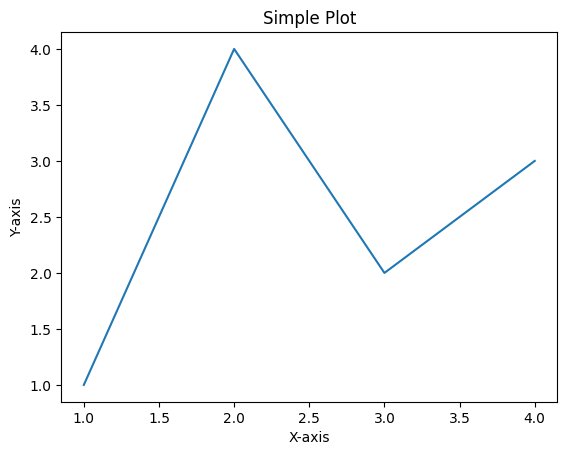

In [127]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 4, 2, 3]

plt.plot(x,y) # plots on the graph (x,y), blue line
plt.xlabel("X-axis") # label for x-axis
plt.ylabel("Y-axis") # label  for y-axis
plt.title("Simple Plot") # title at the top of the plot
plt.show()

**Scatter, histogram, and bar (core EDA)**

<Axes: xlabel='passed'>

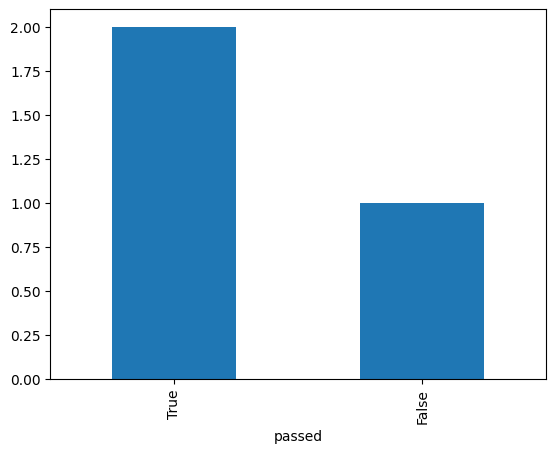

In [136]:
# Correlations (e.g., does score increase with age?)
# plt.scatter(df["age"], df["score"])

# Show how values are distributed in score
# plt.hist(df["score"], bins=10)

# Counts how many times each category appears in "passed".
df["passed"].value_counts().plot(kind="bar")
plt.show()

# Putting It Together: Mini EDA Workflow


1.   Load and inspect:



In [ ]:
df = pd.read_csv("data.csv")
df.info()
df.describe()

2.   Clean:

In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

# Drop rows where target is missing
df = df.dropna(subset=["target"])

# Fill missing values in feature column
df["feature"] = df["feature"].fillna(df["feature"].median())

3. Explore distributions and relationships:

In [ ]:
# Histogram of feature
df["feature"].hist(bins=30)
plt.show()

# Scatter plot of feature vs target
plt.scatter(df["feature"], df["target"])
plt.xlabel("feature"); plt.ylabel("target")
plt.show()

4. Summarize by groups:

In [ ]:
'''
- groupby: For each category, count how many rows are there,
- agg: find the average target value, and the standard deviation.
- sort_values: Then sort so the categories with the highest average target appear first.
'''

df.groupby("category")["target"].agg(
    ["count", "mean", "std"]).sort_values(
        "mean", ascending=False)


5. Save results:

In [ ]:
summary = df.groupby("category")["target"].mean().reset_index()
summary.to_csv("summary.csv", index=False)
